# **Unemployment Trend Analysis in India**

~by Ayanna

## Import Libraries

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Import Data

In [190]:
data1 = pd.read_csv('/content/drive/MyDrive/datasets/Unemployment in India.csv')
data2 = pd.read_csv('/content/drive/MyDrive/datasets/Unemployment_Rate_upto_11_2020.csv')
dataset = pd.concat([data1,data2])
dataset

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


## Exploratory Data Analysis


In [191]:
dataset.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN


In [192]:
dataset.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    1007 non-null   object 
 1    Date                                     1007 non-null   object 
 2    Frequency                                1007 non-null   object 
 3    Estimated Unemployment Rate (%)          1007 non-null   float64
 4    Estimated Employed                       1007 non-null   float64
 5    Estimated Labour Participation Rate (%)  1007 non-null   float64
 6   Area                                      740 non-null    object 
 7   Region.1                                  267 non-null    object 
 8   longitude                                 267 non-null    float64
 9   latitude                                  267 non-null    float64
dtypes: float64(5), object(5)
memory usage: 121

In [194]:
dataset.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,1007.000000,1.007000e+03,1007.000000,267.000000,267.000000
mean,11.906991,8.996209e+06,42.378620,22.826048,80.532425
std,10.739549,1.020784e+07,8.048542,6.270731,5.831738
min,0.000000,4.942000e+04,13.330000,10.850500,71.192400
25%,4.685000,1.639125e+06,37.835000,18.112400,76.085600
50%,8.890000,5.543380e+06,40.880000,23.610200,79.019300
75%,16.125000,1.287115e+07,45.315000,27.278400,85.279900
max,76.740000,5.943376e+07,72.570000,33.778200,92.937600


In [195]:
dataset.shape

(1035, 10)

## Data Preprocessing and Cleaning

In [196]:
dataset.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,295
Region.1,768
longitude,768
latitude,768


In [197]:
dataset.duplicated().sum()

np.int64(27)

In [198]:
duplicated = dataset[dataset.duplicated()]
duplicated

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
dataset.rename(columns={'Region.1':'Region Direction'},inplace=True)

In [200]:
cleaned_data=dataset.dropna(subset=['Region'])
cleaned_data=dataset.drop(columns=['longitude','latitude'])
cleaned_data

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN
...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,NaN,East
263,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,NaN,East
264,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,NaN,East
265,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,NaN,East


In [201]:
cleaned_data['Region Direction'] = (
    cleaned_data.groupby('Region')['Region Direction']
    .transform(lambda x: x.ffill().bfill())
)

cleaned_data['Area'] = (
    cleaned_data.groupby('Region')['Area']
    .transform(lambda x: x.ffill().bfill())
)
cleaned_data

/tmp/ipython-input-2579998410.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.ffill().bfill())
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,South
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,South
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,South
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,South
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,South
...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,Urban,East
263,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,Urban,East
264,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,Urban,East
265,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,Urban,East


In [202]:
cleaned_data.columns = cleaned_data.columns.str.strip()

In [203]:
cleaned_data['Frequency'] = cleaned_data['Frequency'].astype(str).str.strip()

cleaned_data['Frequency'] = cleaned_data['Frequency'].replace('M', 'Monthly')
cleaned_data

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,South
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,South
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,South
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,South
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,South
...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,Monthly,7.29,30726310.0,40.39,Urban,East
263,West Bengal,31-07-2020,Monthly,6.83,35372506.0,46.17,Urban,East
264,West Bengal,31-08-2020,Monthly,14.87,33298644.0,47.48,Urban,East
265,West Bengal,30-09-2020,Monthly,9.35,35707239.0,47.73,Urban,East


In [204]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
cleaned_data

/tmp/ipython-input-1344380992.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South
...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,Monthly,7.29,30726310.0,40.39,Urban,East
263,West Bengal,2020-07-31,Monthly,6.83,35372506.0,46.17,Urban,East
264,West Bengal,2020-08-31,Monthly,14.87,33298644.0,47.48,Urban,East
265,West Bengal,2020-09-30,Monthly,9.35,35707239.0,47.73,Urban,East


## Visualizations

In [205]:
cleaned_data.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412.0,43.01,Rural,South
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681.0,41.00,Rural,South
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395.0,45.14,Rural,South
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural,South
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural,South


In [206]:
cleaned_data['Estimated Unemployment Rate (%)']

,Estimated Unemployment Rate (%)
0,3.65
1,3.05
2,3.75
3,3.32
4,5.17
...,...
262,7.29
263,6.83
264,14.87
265,9.35


### How Have Urban and Rural Unemployment Rates Changed Over Time?

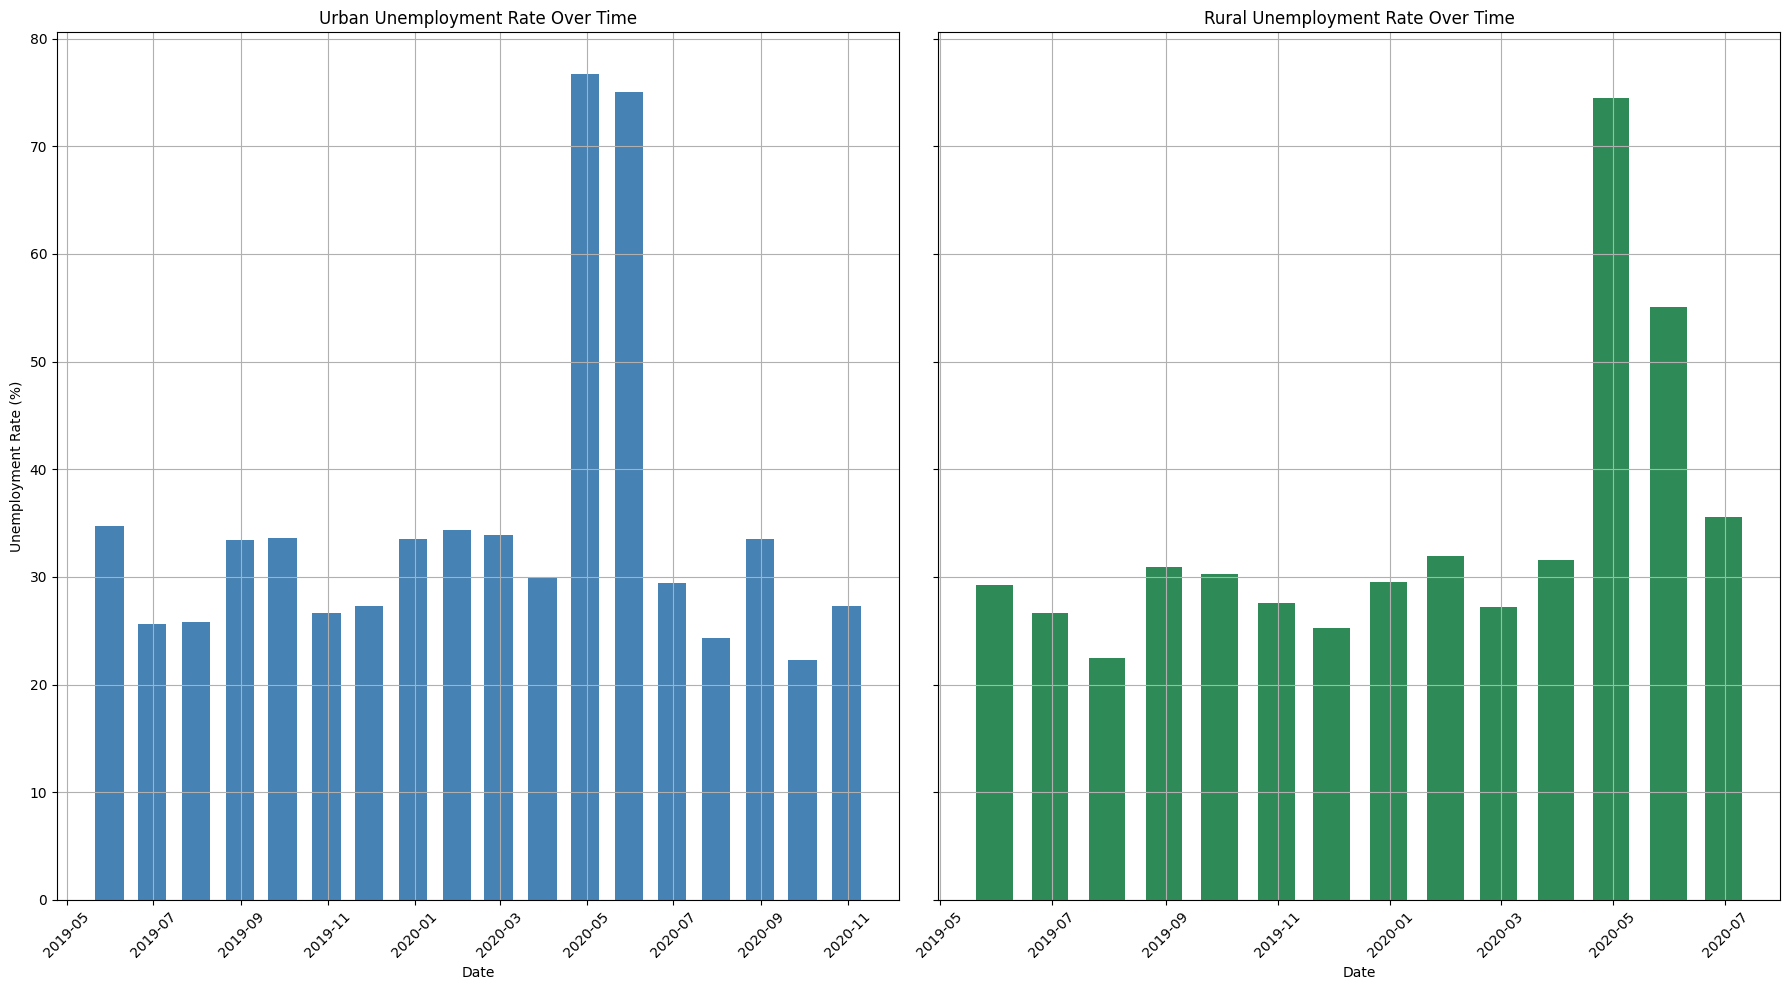

In [207]:
urban = urban.sort_values('Date')
rural = rural.sort_values('Date')

fig, ax = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

#Urban Bar Plot
ax[0].bar(urban['Date'], urban['Estimated Unemployment Rate (%)'], color='steelblue', width=20)
ax[0].set_title('Urban Unemployment Rate Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Unemployment Rate (%)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Rural Bar Plot
ax[1].bar(rural['Date'], rural['Estimated Unemployment Rate (%)'], color='seagreen', width=20)
ax[1].set_title('Rural Unemployment Rate Over Time')
ax[1].set_xlabel('Date')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Did the Unemployment Rate Increase After the Onset of COVID-19?

In [208]:
pre_covid = cleaned_data[cleaned_data['Date'] < '2020-03-01']
post_covid = cleaned_data[cleaned_data['Date'] >= '2020-03-01']

pre_mean = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_mean = post_covid['Estimated Unemployment Rate (%)'].mean()

print(f"Pre-Covid Unemployment Rate: {pre_mean:.2f}%")
print(f"Post-Covid Unemployment Rate: {post_mean:.2f}%")

Pre-Covid Unemployment Rate: 9.48%
Post-Covid Unemployment Rate: 15.31%


### How Do Urban and Rural Unemployment Rates Compare Over Time?

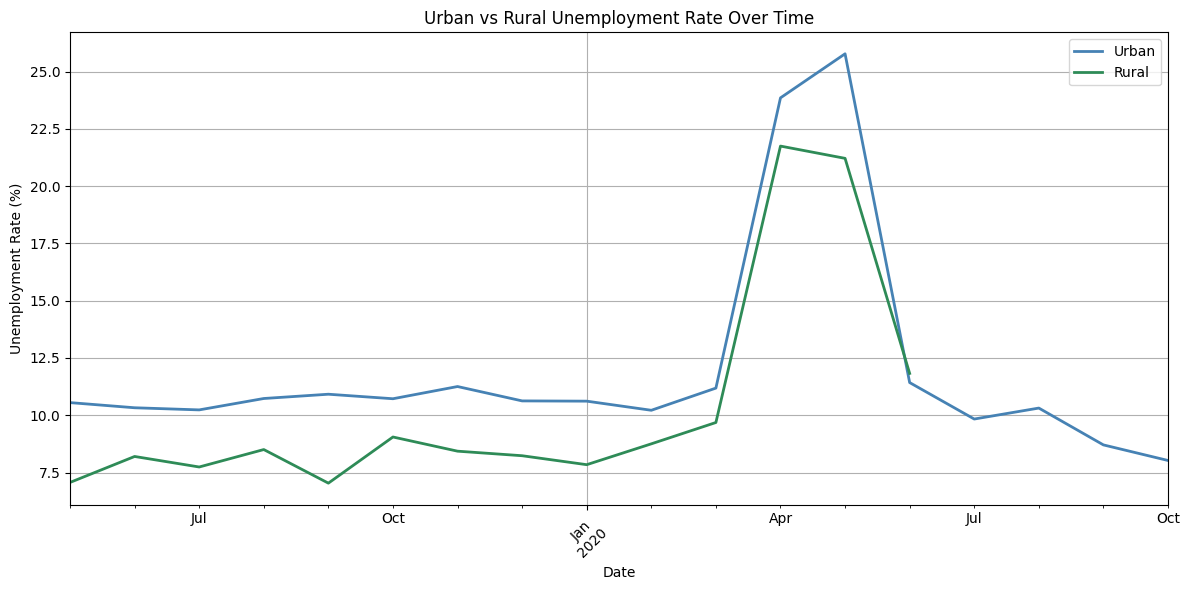

In [209]:
urban_avg = urban.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
rural_avg = rural.groupby('Date')['Estimated Unemployment Rate (%)'].mean()


plt.figure(figsize=(12, 6))
urban_avg.plot(label='Urban', color='steelblue', linewidth=2)
rural_avg.plot(label='Rural', color='seagreen', linewidth=2)

plt.title('Urban vs Rural Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Which Regions Have the Highest and Lowest Unemployment Rates?

/tmp/ipython-input-11308758.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=cleaned_data, ci=None, palette="magma")
/tmp/ipython-input-11308758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=cleaned_data, ci=None, palette="magma")


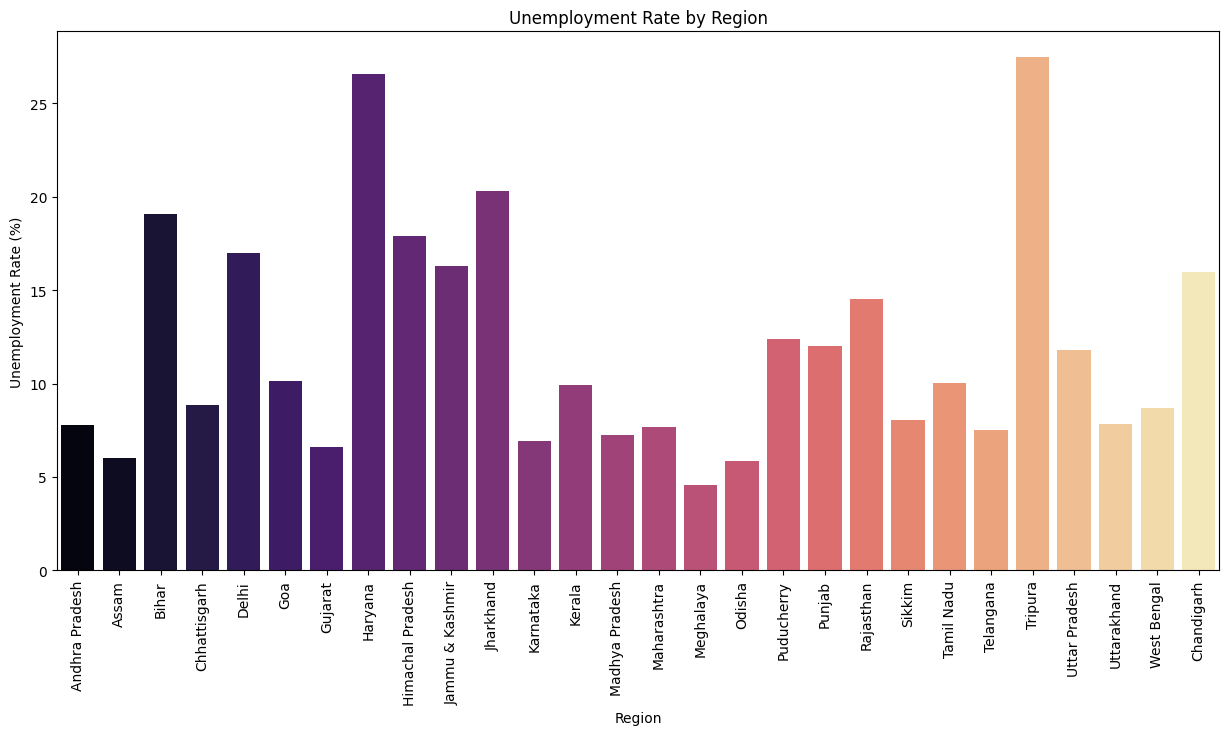

In [214]:
plt.figure(figsize=(15, 7))

sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=cleaned_data, ci=None, palette="magma")

plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

### How Did Unemployment Trends Change from 2019 to 2020 During the COVID-19 Outbreak?

/tmp/ipython-input-3082285157.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


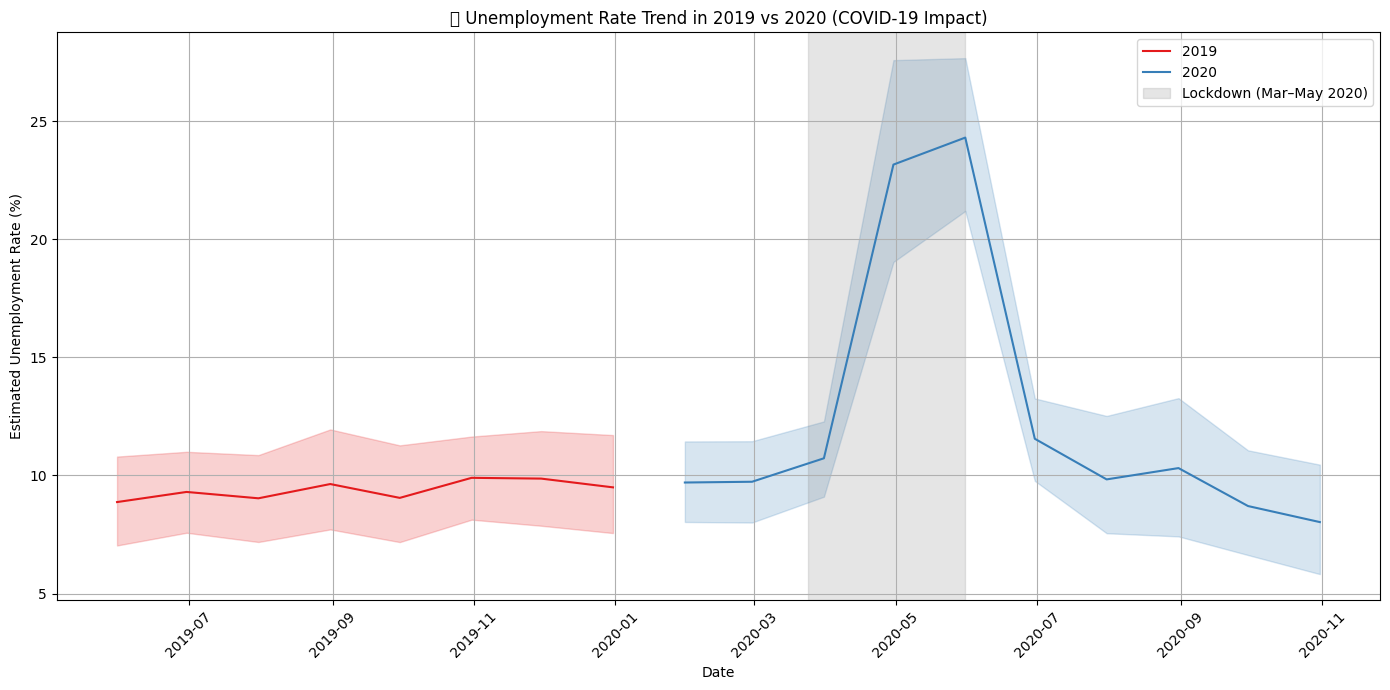

In [231]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

compare_data = cleaned_data[cleaned_data['Date'].dt.year.isin([2019, 2020])]
compare_data = compare_data.sort_values('Date')

compare_data['Year'] = compare_data['Date'].dt.year

plt.figure(figsize=(14, 7))
sns.lineplot(data=compare_data, x='Date', y='Estimated Unemployment Rate (%)', hue='Year', palette='Set1')

plt.axvspan(pd.to_datetime('2020-03-24'), pd.to_datetime('2020-05-31'), color='gray', alpha=0.2, label='Lockdown (Mar–May 2020)')

plt.title("📊 Unemployment Rate Trend in 2019 vs 2020 (COVID-19 Impact)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### How Did Unemployment Rates Vary Across Different Regions During COVID-19 in 2020?

/tmp/ipython-input-2804217608.py:15: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


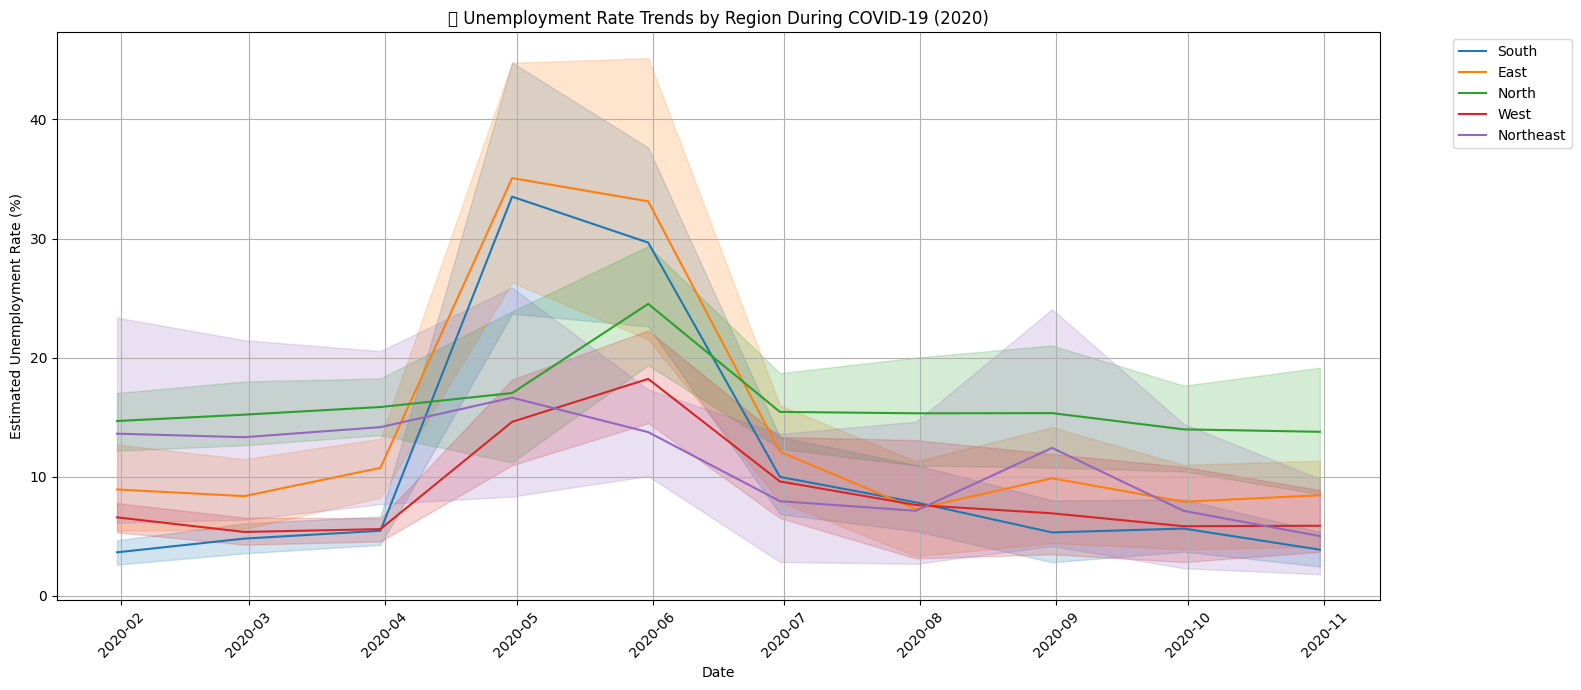

In [222]:
covid_data = cleaned_data[cleaned_data['Date'].dt.year == 2020]

covid_data = covid_data.sort_values('Date')


plt.figure(figsize=(14, 7))
sns.lineplot(data=covid_data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region Direction', palette='tab10')

plt.title("📉 Unemployment Rate Trends by Region During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Which States Had the Highest Unemployment Rates During COVID-19 in 2020?

/tmp/ipython-input-192790680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')


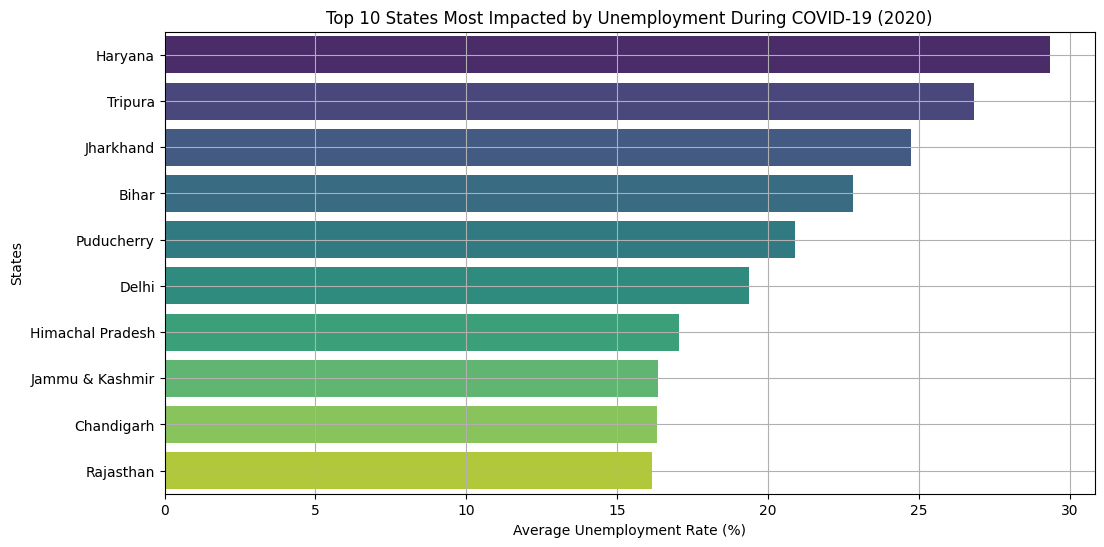

In [228]:
state_avg = covid_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')
plt.title("Top 10 States Most Impacted by Unemployment During COVID-19 (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("States")
plt.grid(True)
plt.show()


### What Were the Monthly Unemployment Trends During the COVID-19 Year (2020)?

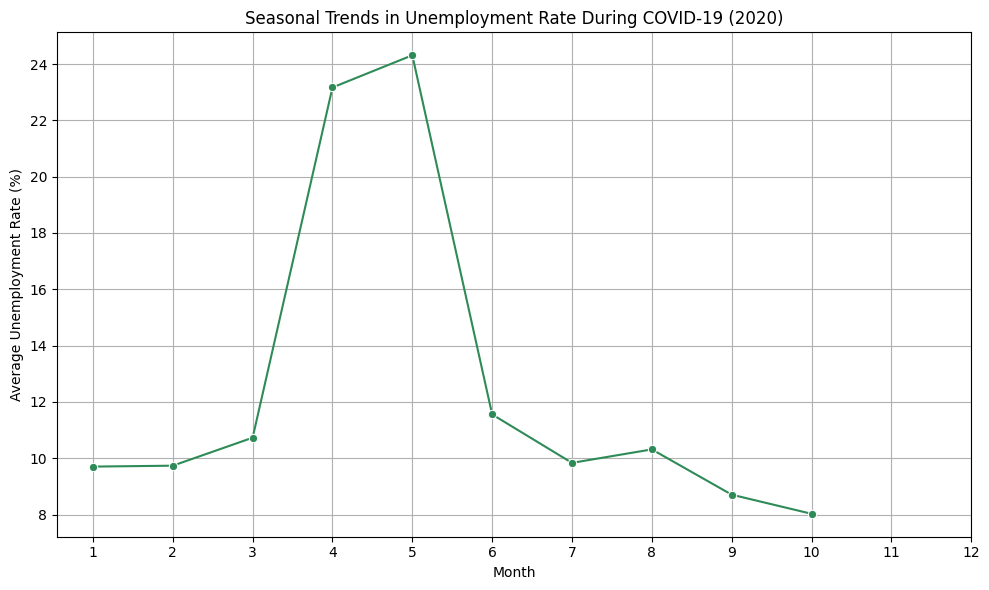

In [225]:
covid_data['Month'] = covid_data['Date'].dt.month


monthly_avg = covid_data.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=monthly_avg, marker='o', color='seagreen')
plt.title("Seasonal Trends in Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


### What Are the Relationships Between Key Employment Metrics?

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

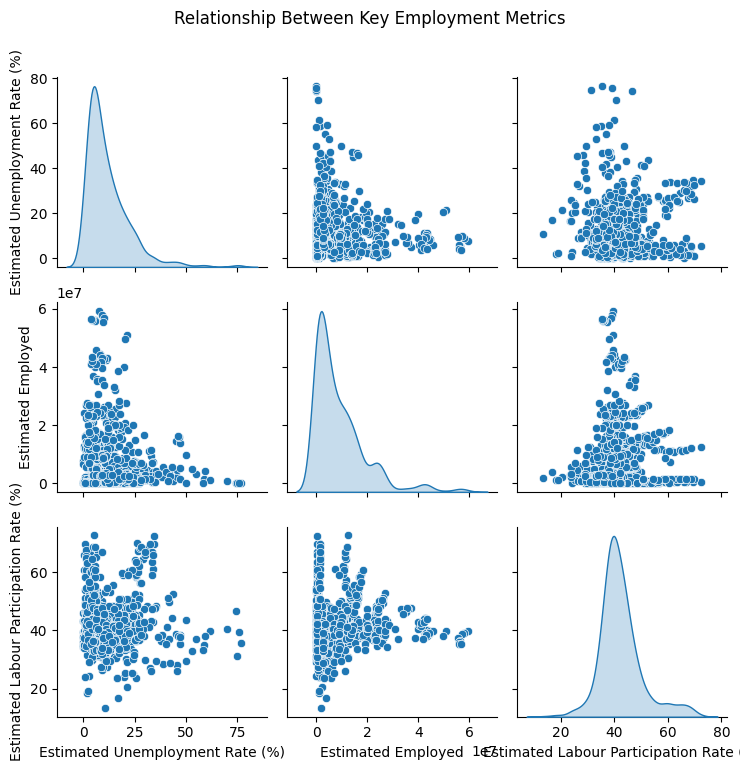

In [230]:
pair_data = cleaned_data[[
    "Estimated Unemployment Rate (%)",
    "Estimated Employed",
    "Estimated Labour Participation Rate (%)"
]]

sns.pairplot(pair_data, diag_kind="kde", palette="husl", markers="o")

plt.suptitle("Relationship Between Key Employment Metrics", y=1.02)
plt.tight_layout()
plt.show()


In [232]:
from google.colab import files
files.download("Unemployment Analysis.ipynb")

FileNotFoundError: Cannot find file: Unemployment Analysis.ipynb